In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [201]:
df = pd.read_csv(r'C:\Users\Vivek Raj\Downloads\Kaggle datasets\train_data_cleaning.csv' , header=0)

In [202]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1


In [203]:
df.shape

(7613, 5)

In [204]:
df['length'] = df['text'].apply(len)

In [205]:
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1,71
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1,40
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1,139
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1,67
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1,92


In [206]:
 df.describe()

,id,target,length
count,7613.000000,7613.00000,7613.000000
mean,5441.934848,0.42966,92.453960
std,3137.116090,0.49506,34.833534
min,1.000000,0.00000,6.000000
25%,2734.000000,0.00000,66.000000
50%,5408.000000,0.00000,94.000000
75%,8146.000000,1.00000,120.000000
max,10873.000000,1.00000,203.000000


In [207]:
len(df['location'].unique())

3342

In [208]:
len(df['keyword'].unique())

222

In [209]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
length         0
dtype: int64

In [210]:
max(df['length'])

203

In [211]:
min(df['length'])

6

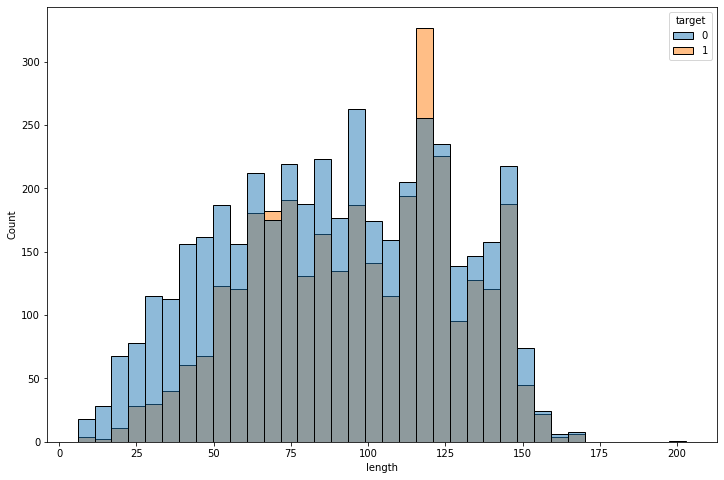

In [212]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=df["length"],
    hue=df["target"]
)

plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

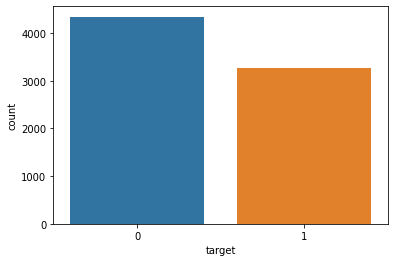

In [213]:
sns.countplot(x=df['target'])

In [214]:
positive = df[df['target']==1]['length'].describe()
positive

count    3271.000000
mean       96.690003
std        32.187342
min         9.000000
25%        70.000000
50%        99.000000
75%       121.000000
max       170.000000
Name: length, dtype: float64

In [215]:
negative = df[df['target']==0]['length'].describe()
negative

count    4342.000000
mean       89.262782
std        36.380521
min         6.000000
25%        61.000000
50%        91.000000
75%       119.000000
max       203.000000
Name: length, dtype: float64

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
x = df['text']
y = df['target']

In [218]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [219]:
## Data cleaning

sentence = []
for line in x:
    line = re.sub("[^a-zA-Z]"," ",line)
    sentence.append(line)

In [220]:
sentence = np.array(sentence)

In [221]:
sentence[:4]

array(['Our Deeds are the Reason of this    earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask    Canada',
       'All residents asked to    shelter in place    are being notified by officers    No other evacuation or shelter in place orders are expected',
       '       people receive    wildfires evacuation orders in California '],
      dtype='<U203')

In [222]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
  
lemmatizer = WordNetLemmatizer()

In [223]:
for word in sentence[1].split():
    print(lemmatizer.lemmatize(word))

Forest
fire
near
La
Ronge
Sask
Canada


In [224]:
lemmatizer.lemmatize('fighting')

'fighting'

In [225]:
sentences = []

for line in sentence:
    line = [lemmatizer.lemmatize(word)
           for word in line.split()]
    
    line = " ".join(line)
    sentences.append(line)
        

In [226]:
sentences = np.array(sentences)
sentences[1]

'Forest fire near La Ronge Sask Canada'

In [227]:
x_train , x_test , y_train , y_test = train_test_split(sentences,y,test_size=0.2 , random_state=0)

In [228]:
## Tokenization

vocab = 50000
max_length = 200

tokenizer = Tokenizer(num_words = vocab , oov_token = 'OOV')
tokenizer.fit_on_texts(x_train)
## word.index function gives the integer value to a word.
word_index = tokenizer.word_index

##texts_to_sequences gives the vectors of integer value to a sentence.
sequences = tokenizer.texts_to_sequences(x_train)
padded = pad_sequences(sequences,maxlen=max_length, truncating='post')

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

## Model

In [238]:
## model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab, 50, input_length=max_length),
    tf.keras.layers.Conv1D(64,3,activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 200, 50)           2000000   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 198, 64)           9664      
_________________________________________________________________
global_average_pooling1d_11  (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 129       
Total params: 2,018,113
Trainable params: 2,018,113
Non-trainable params: 0
_________________________________________________________________


In [241]:
num_epochs = 10
history = model.fit(padded,
                    y_train,
                    epochs=num_epochs,
                    validation_data=(testing_padded, y_test))

Epoch 1/10
191/191 [==============================] - 6s 29ms/step - loss: 0.0515 - accuracy: 0.9788 - val_loss: 0.8068 - val_accuracy: 0.7853
Epoch 2/10
191/191 [==============================] - 7s 37ms/step - loss: 0.0505 - accuracy: 0.9783 - val_loss: 0.8380 - val_accuracy: 0.7656
Epoch 3/10
191/191 [==============================] - 8s 39ms/step - loss: 0.0505 - accuracy: 0.9791 - val_loss: 0.8307 - val_accuracy: 0.7820
Epoch 4/10
191/191 [==============================] - 8s 42ms/step - loss: 0.0461 - accuracy: 0.9785 - val_loss: 0.8511 - val_accuracy: 0.7846
Epoch 5/10
191/191 [==============================] - 9s 45ms/step - loss: 0.0425 - accuracy: 0.9811 - val_loss: 0.8885 - val_accuracy: 0.7597
Epoch 6/10
191/191 [==============================] - 8s 43ms/step - loss: 0.0439 - accuracy: 0.9803 - val_loss: 0.8940 - val_accuracy: 0.7873
Epoch 7/10
191/191 [==============================] - 8s 43ms/step - loss: 0.0404 - accuracy: 0.9819 - val_loss: 0.8890 - val_accuracy: 0.7846

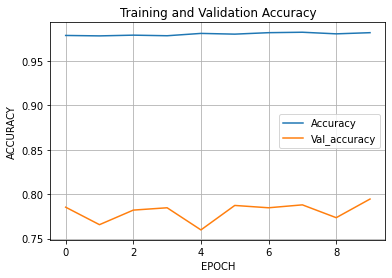

In [242]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('Training and Validation Accuracy')
plt.legend(labels=['Accuracy' , 'Val_accuracy'])
plt.grid()
plt.show()

In [243]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab, 100, input_length=max_length),
    tf.keras.layers.LSTM(128 , return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 200, 100)          4000000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 200, 128)          117248    
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               3276928   
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 129       
Total params: 7,394,305
Trainable params: 7,394,305
Non-trainable params: 0
_________________________________________________________________


In [244]:
num_epochs = 10
history_2 = model_2.fit(padded,
                    y_train,
                    epochs=num_epochs,
                    validation_data=(testing_padded, y_test))

Epoch 1/10
191/191 [==============================] - 37s 189ms/step - loss: 0.6368 - accuracy: 0.6279 - val_loss: 0.4325 - val_accuracy: 0.8076
Epoch 2/10
191/191 [==============================] - 54s 283ms/step - loss: 0.3114 - accuracy: 0.8803 - val_loss: 0.4454 - val_accuracy: 0.8162
Epoch 3/10
191/191 [==============================] - 73s 384ms/step - loss: 0.1681 - accuracy: 0.9407 - val_loss: 0.5548 - val_accuracy: 0.7754
Epoch 4/10
191/191 [==============================] - 53s 279ms/step - loss: 0.1101 - accuracy: 0.9645 - val_loss: 0.5653 - val_accuracy: 0.7945
Epoch 5/10
191/191 [==============================] - 76s 398ms/step - loss: 0.0695 - accuracy: 0.9767 - val_loss: 0.6011 - val_accuracy: 0.7892
Epoch 6/10
191/191 [==============================] - 53s 280ms/step - loss: 0.0573 - accuracy: 0.9802 - val_loss: 0.7764 - val_accuracy: 0.7833
Epoch 7/10
191/191 [==============================] - 67s 352ms/step - loss: 0.0513 - accuracy: 0.9797 - val_loss: 0.9605 - val_ac

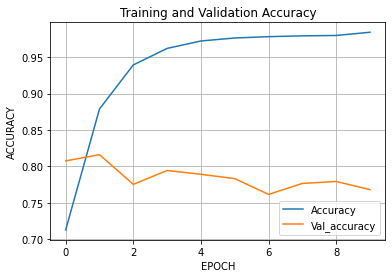

In [245]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.title('Training and Validation Accuracy')
plt.legend(labels=['Accuracy' , 'Val_accuracy'])
plt.grid()
plt.show()